In [1]:
#Shared/Utility scripts
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
import os
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")
#set path directory
HOME = os.path.expanduser('~')
cwd = os.getcwd()

In [8]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date
from shared_scripts import Reach_Eval
model = 'MLP'
year = 2020
#get NWIS ids from prediction file
with open(f"{HOME}/NWM_ML/Predictions/Hindcast/{model}/{year}/{model}_predictions.pkl", "rb") as f:
    # Decompress data from file
    predictions = pkl.load(f)
NWIS_list = list(predictions.keys())
#plot list of top performing sites
Eval_Metric = 'KGE'
startDT ='2020-1-01'
endDT ='2020-9-20'

Reach_Eval = Reach_Eval.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

Getting geospatial information for NHD reaches


Dropping USGS sites with no NHD reach
Getting  MLP  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


In [9]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = False)

Plotting monitoring station locations


,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs
0,10149000,10349162,"SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT",3120,3817,50.318143,0.550853,15.3000,7600.0,56.0,0.03720,3.78,27.2,19.400,33.0,50.1
1,10153100,10348934,"HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH",4487,6282,44.990188,0.520904,NaN,NaN,NaN,NaN,NaN,NaN,20.100,39.0,99.9
2,10164500,10329013,AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...,4204,7001,27.222831,0.511961,51.1000,8470.0,71.5,0.01730,3.42,39.4,16.800,53.0,111.8
3,10140100,10275828,"OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT",5961,12054,43.577336,0.428830,0.0929,6060.0,11.2,0.00000,26.80,30.3,17.000,98.0,313.4
4,10133650,10276856,"E CANYON CR BL I-80 REST STOP NR PARK CITY, UT",3707,5518,66.793573,0.393949,42.1000,7620.0,65.7,2.80000,3.05,24.1,9.240,19.0,44.6
5,10134500,10277268,"EAST CANYON CREEK NEAR MORGAN, UT",10717,20333,47.566161,0.217932,152.0000,7090.0,60.9,1.65000,4.68,25.8,18.700,60.0,148.4
6,10105900,666170,"LITTLE BEAR RIVER AT PARADISE, UT",16095,22297,57.699591,0.213357,180.0000,6700.0,20.5,0.06530,18.90,33.2,27.800,86.0,199.8
7,10137500,10274270,"SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT",23656,33187,52.812258,0.071853,137.0000,7220.0,26.3,0.02530,21.90,35.5,32.600,115.0,259.2
8,10133980,10276712,"EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH",11863,15962,75.826698,0.062522,115.0000,7240.0,65.5,2.13000,3.45,26.4,24.900,46.0,127.4
9,10140700,10274376,"OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT",32046,44346,68.608840,0.051093,333.0000,6690.0,17.8,0.48000,22.30,36.2,34.700,132.0,427.2


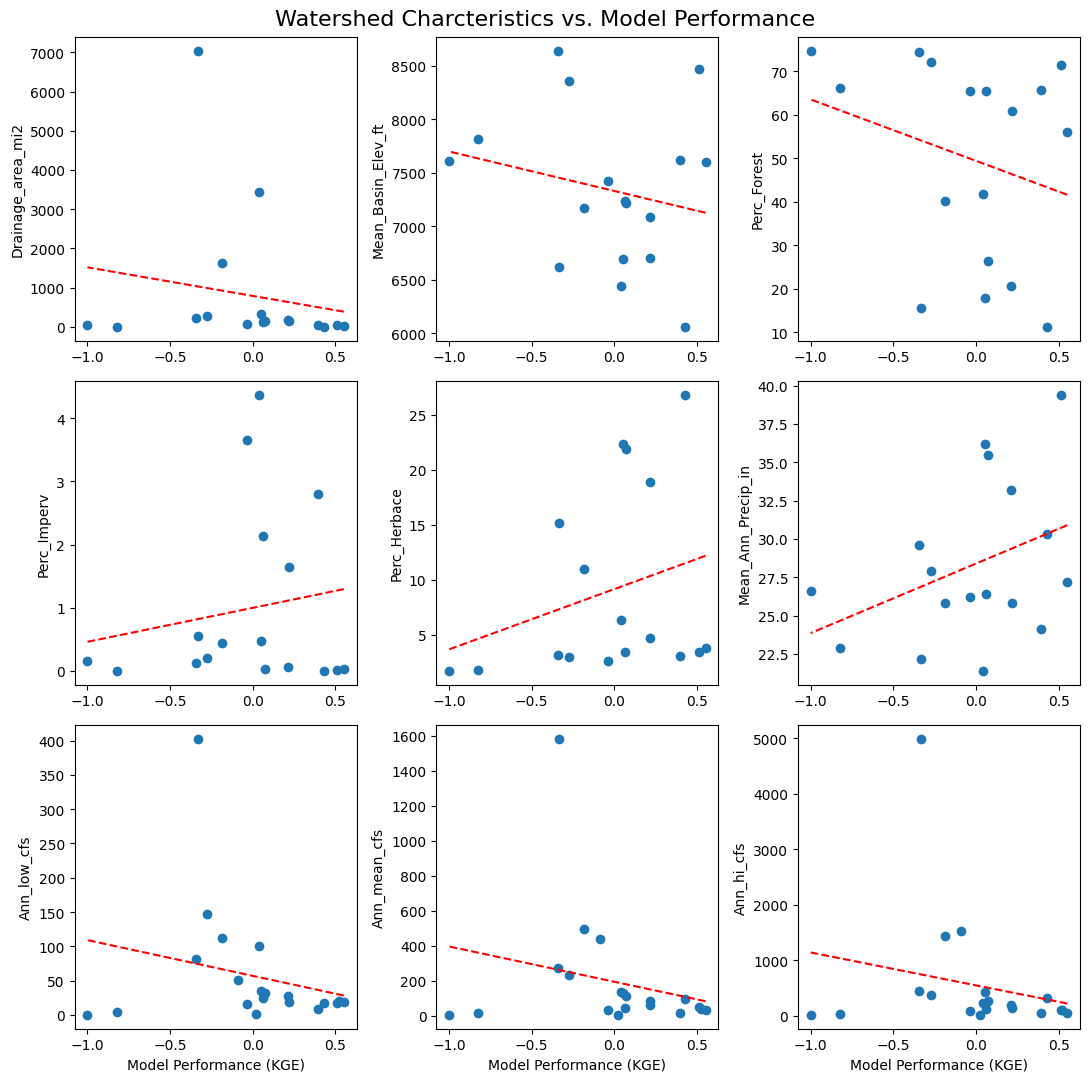

SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT


,USGS: 10149000,LSTM: 10349162
Datetime,,
2020-01-31,1410.438751,365.665720
2020-02-29,2707.459208,798.502328
2020-03-31,4216.186526,1471.775758
2020-04-30,5774.850911,2377.451251
2020-05-31,7373.510392,3609.995802
2020-06-30,8850.221568,5033.453874
2020-07-31,10231.600045,6646.014873
2020-08-31,11623.232276,8277.348237
2020-09-30,12576.348830,9261.125213


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10349162 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH


,USGS: 10153100,LSTM: 10348934
Datetime,,
2020-01-31,1686.035423,753.684575
2020-02-29,3437.480931,1549.783466
2020-03-31,5513.541388,2613.049225
2020-04-30,7586.786471,3903.630005
2020-05-31,11713.306019,5533.382581
2020-06-30,13617.793257,7335.929519
2020-07-31,14922.972468,9337.632239
2020-08-31,16289.444359,11357.093500
2020-09-30,17235.696430,12591.100771


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10153100 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10348934 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK, UT


,USGS: 10164500,LSTM: 10329013
Datetime,,
2020-01-31,795.019815,908.798067
2020-02-29,1537.203013,1849.436770
2020-03-31,2426.929609,3065.317765
2020-04-30,4018.309825,4504.230310
2020-05-31,9089.445977,6349.872502
2020-06-30,14439.949699,8354.432660
2020-07-31,17520.591150,10519.143495
2020-08-31,18737.158646,12692.983536
2020-09-30,19341.434518,14025.913388


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10329013 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT


,USGS: 10140100,LSTM: 10275828
Datetime,,
2020-01-31,654.111754,1117.763095
2020-02-29,1292.842253,2252.804634
2020-03-31,2311.061116,3676.672513
2020-04-30,3778.313796,5326.990149
2020-05-31,7729.757337,7334.255775
2020-06-30,12132.172271,9500.569247
2020-07-31,17578.095488,11876.539211
2020-08-31,25647.000916,14267.589719
2020-09-30,27794.263576,15739.921166


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10275828 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

E CANYON CR BL I-80 REST STOP NR PARK CITY, UT


,USGS: 10133650,LSTM: 10276856
Datetime,,
2020-01-31,752.027819,66.443803
2020-02-29,1450.434265,139.097261
2020-03-31,3288.410695,358.581514
2020-04-30,4945.897111,761.240169
2020-05-31,7309.277827,1790.853848
2020-06-30,8609.365265,3152.557171
2020-07-31,9109.560885,4691.021352
2020-08-31,9394.365128,6246.675463
2020-09-30,9570.953550,7180.939164


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133650 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10276856 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR MORGAN, UT


,USGS: 10134500,LSTM: 10277268
Datetime,,
2020-01-31,691.063106,1003.392929
2020-02-29,1363.874349,1959.896971
2020-03-31,4295.944332,3166.795280
2020-04-30,10160.557365,4600.154135
2020-05-31,12204.925012,6715.885039
2020-06-30,17304.804364,9067.066317
2020-07-31,24327.103162,11567.617145
2020-08-31,32077.637959,14000.861608
2020-09-30,35792.106764,15458.920492


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10277268 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

LITTLE BEAR RIVER AT PARADISE, UT


,USGS: 10105900,LSTM: 666170
Datetime,,
2020-01-31,2917.602374,1517.367580
2020-02-29,5604.102586,2957.668058
2020-03-31,13180.529383,4711.362336
2020-04-30,23232.459126,6727.590934
2020-05-31,31573.748078,9276.943862
2020-06-30,33573.728193,11984.376843
2020-07-31,34842.559072,14922.458516
2020-08-31,35969.657016,17878.159940
2020-09-30,36777.952975,19715.810434


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10105900 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_666170   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT


,USGS: 10137500,LSTM: 10274270
Datetime,,
2020-01-31,1955.532783,1690.285910
2020-02-29,3992.262636,3409.387159
2020-03-31,10333.489704,5481.206774
2020-04-30,23711.551409,7612.526705
2020-05-31,38118.379124,10315.815820
2020-06-30,42512.740229,13160.495257
2020-07-31,47127.478667,16176.142025
2020-08-31,51589.263823,19039.840076
2020-09-30,53924.151278,20737.011810


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10274270 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH


,USGS: 10133980,LSTM: 10276712
Datetime,,
2020-01-31,1773.429510,337.365681
2020-02-29,3575.574989,655.147563
2020-03-31,7937.982884,1154.708830
2020-04-30,12847.601736,1898.753157
2020-05-31,18147.410901,3265.296420
2020-06-30,20840.979717,4879.397649
2020-07-31,21926.589593,6673.667657
2020-08-31,22596.829130,8481.276106
2020-09-30,23068.709180,9576.440526


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133980 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10276712 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT


,USGS: 10140700,LSTM: 10274376
Datetime,,
2020-01-31,3178.656033,1933.775519
2020-02-29,16964.802540,3765.206598
2020-03-31,28900.078734,5929.944966
2020-04-30,36538.757915,8351.066266
2020-05-31,44301.017241,11559.118429
2020-06-30,51000.170039,14921.423904
2020-07-31,57660.263480,18470.601528
2020-08-31,65129.916667,21903.842906
2020-09-30,68331.226427,23985.272151


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140700 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10274376 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT


,USGS: 10171000,LSTM: 10390290
Datetime,,
2020-01-31,7238.652307,2162.426558
2020-02-29,14086.060777,4276.650718
2020-03-31,20102.674854,6758.998985
2020-04-30,28805.896619,9461.572408
2020-05-31,39346.491793,12622.121202
2020-06-30,49387.180897,15907.330259
2020-07-31,60637.091066,19339.527193
2020-08-31,70970.442375,22758.113648
2020-09-30,77681.368779,24888.834610


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10390290 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SILVER CREEK NEAR SILVER CREEK JUNCTION, UT


,USGS: 10129900,LSTM: 10093082
Datetime,,
2020-01-31,415.848805,17.890585
2020-02-29,840.158528,124.230303
2020-03-31,1788.583214,449.108174
2020-04-30,2352.426958,1037.998102
2020-05-31,2807.549832,1934.356895
2020-06-30,3216.217414,3021.485359
2020-07-31,3454.177210,4283.666776
2020-08-31,3607.989845,5564.167023
2020-09-30,3704.688981,6321.716621


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129900 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10093082 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR JEREMY RANCH, UT


,USGS: 10133800,LSTM: 10276836
Datetime,,
2020-03-31,6334.029570,91.910117
2020-04-30,10083.698704,372.400520
2020-05-31,14191.022555,1283.935031
2020-06-30,16177.839822,2528.762627
2020-07-31,17044.702886,3943.425925
2020-08-31,17565.242472,5373.890219
2020-09-30,17897.063235,6226.763712


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133800 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10276836 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER NEAR PLAIN CITY, UT


,USGS: 10141000,LSTM: 10273232
Datetime,,
2020-01-31,12061.275203,2701.599849
2020-02-29,34508.457025,5257.113489
2020-03-31,66769.574062,8192.354023
2020-04-30,91441.946325,11450.525808
2020-05-31,97910.994276,15504.478080
2020-06-30,104240.773670,19680.252327
2020-07-31,108541.181853,23994.749606
2020-08-31,111863.213701,28162.635409
2020-09-30,116654.945259,30705.844248


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10273232 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER AT GATEWAY, UT


,USGS: 10136500,LSTM: 10274616
Datetime,,
2020-01-31,3647.653783,2401.604399
2020-02-29,8108.565134,4674.029952
2020-03-31,32163.324226,7292.560674
2020-04-30,60290.113753,10215.440901
2020-05-31,87034.834833,13906.828133
2020-06-30,109331.046522,17744.544220
2020-07-31,132278.632385,21718.445993
2020-08-31,155969.409309,25558.609816
2020-09-30,168472.658031,27895.410107


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10274616 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT


,USGS: 10155200,LSTM: 10373794
Datetime,,
2020-01-31,7368.352917,1214.260858
2020-02-29,14185.378951,2370.437850
2020-03-31,21548.795003,3768.468924
2020-04-30,30550.912692,5417.827094
2020-05-31,81167.028760,7780.742168
2020-06-30,120696.790634,10322.768938
2020-07-31,138994.531849,13015.881141
2020-08-31,152311.760804,15670.992220
2020-09-30,161697.733605,17290.338241


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10373794 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

BEAR RIVER NEAR CORINNE, UT


,USGS: 10126000,LSTM: 4605050
Datetime,,
2020-01-31,89206.495168,3930.281403
2020-02-29,181723.304248,7613.294582
2020-03-31,338843.830101,11769.582582
2020-04-30,456117.623388,16136.788466
2020-05-31,531465.098664,21614.210728
2020-06-30,589257.764805,27439.136592
2020-07-31,615152.913974,33177.972120
2020-08-31,630196.486154,38647.752658
2020-09-30,645985.662964,42008.501716


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_4605050  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIVER NEAR HAILSTONE, UT


,USGS: 10155000,LSTM: 10373622
Datetime,,
2020-01-31,5261.741773,578.496128
2020-02-29,10299.652399,1141.814110
2020-03-31,17949.000150,1906.564857
2020-04-30,34054.570796,2935.610952
2020-05-31,134463.094834,4605.209146
2020-06-30,173327.601455,6446.872015
2020-07-31,176631.665710,8455.054693
2020-08-31,178623.824675,10469.231614
2020-09-30,180350.468222,11694.929942


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10373622 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT


,USGS: 10145400,LSTM: 10331031
Datetime,,
2020-01-31,615.845438,949.618320
2020-02-29,1137.693371,1928.757698
2020-03-31,1377.143925,3186.035530
2020-04-30,1641.233257,4655.745778
2020-05-31,3420.909666,6469.834702
2020-06-30,4410.971986,8456.106769
2020-07-31,5033.518310,10650.649441
2020-08-31,5461.182010,12864.495548
2020-09-30,5687.696794,14224.376458


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10145400 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10331031 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

DANIELS CREEK AT CHARLESTON, UT


,USGS: 10157500,LSTM: 10375690
Datetime,,
2020-01-31,25.701939,697.151421
2020-02-29,83.741757,1439.639317
2020-03-31,228.798577,2444.073742
2020-04-30,383.055568,3672.924558
2020-05-31,585.009808,5247.381671
2020-06-30,710.835175,6999.652742
2020-07-31,751.713701,8950.235323
2020-08-31,762.729770,10903.720089
2020-09-30,766.056459,12111.815729


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10157500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10375690 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [7]:
#Holoviews plots.
freq = 'M'
Reach_Eval.Interactive_Model_Eval(freq, supply =True)